In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten # Layers to be used for building our model
from tensorflow.keras.models import Model, Sequential # The class used to create a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import EarlyStopping

**Load Data**

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


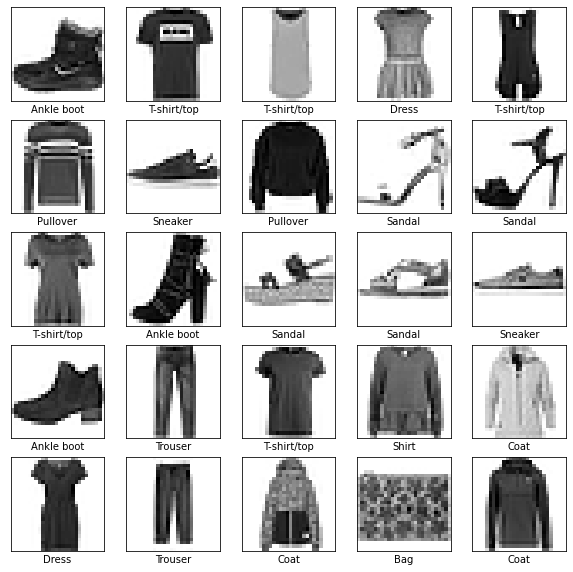

In [3]:
class_names = { 0: 'T-shirt/top',
                1: 'Trouser',
                2: 'Pullover',
                3: 'Dress',
                4: 'Coat',
                5: 'Sandal',
                6: 'Shirt',
                7: 'Sneaker',
                8: 'Bag',
                9: 'Ankle boot' }

plt.figure(figsize=(10,10))
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(train_images[i], cmap=plt.cm.binary)
   plt.xlabel(class_names[train_labels[i]])
plt.show()

**Data Preparation**

In [4]:
# Train/validation/test split
train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels, stratify=train_labels, random_state=48, test_size=0.2)
(test_x, test_y) = (test_images, test_labels)

In [5]:
# normalize to range 0-1
train_x = train_x / 255.0
val_x = val_x / 255.0
test_x = test_x / 255.0

In [6]:
#one-hot encode
train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y = to_categorical(test_y)

In [7]:
print(train_x.shape)  #(57000, 28, 28)
print(train_y.shape)  #(57000, 10)
print(val_x.shape)    #(3000, 28, 28)
print(val_y.shape)    #(3000, 10)
print(test_x.shape)   #(10000, 28, 28)
print(test_y.shape)   #(10000, 10)

(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)
(10000, 28, 28)
(10000, 10)


**Train MLP model**

In [8]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28, 28)))
model_mlp.add(Dense(350, activation='relu'))
model_mlp.add(Dense(10, activation='softmax'))

print(model_mlp.summary())

model_mlp.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 10)                3510      
                                                                 
Total params: 278,260
Trainable params: 278,260
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
early_stop = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5, verbose=1)
callback = [early_stop]

history_mlp = model_mlp.fit(train_x, train_y, 
                            epochs=100, 
                            batch_size=32, 
                            validation_data=(val_x, val_y), 
                            callbacks=callback)

Epoch 1/100
1500/1500 [==============================] - 11s 5ms/step - loss: 0.4986 - accuracy: 0.8222 - val_loss: 0.4298 - val_accuracy: 0.8396
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3763 - accuracy: 0.8633 - val_loss: 0.3790 - val_accuracy: 0.8594
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3346 - accuracy: 0.8766 - val_loss: 0.3395 - val_accuracy: 0.8766
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3102 - accuracy: 0.8856 - val_loss: 0.3291 - val_accuracy: 0.8829
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2912 - accuracy: 0.8922 - val_loss: 0.3114 - val_accuracy: 0.8892
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2780 - accuracy: 0.8972 - val_loss: 0.3208 - val_accuracy: 0.8825
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2629 - accuracy: 0.9015 - val_loss: 0.3278 - val_a

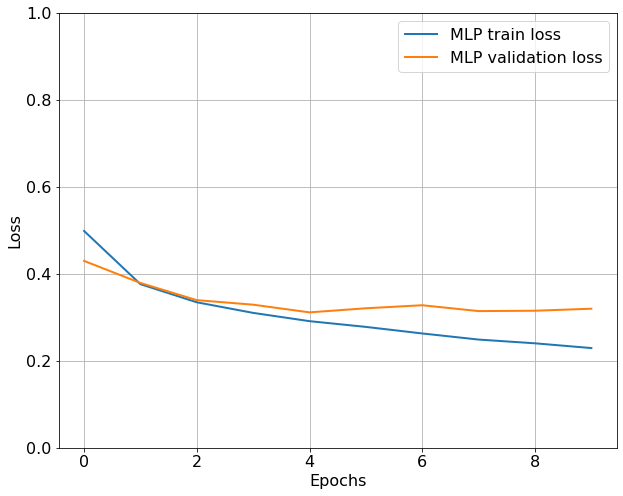

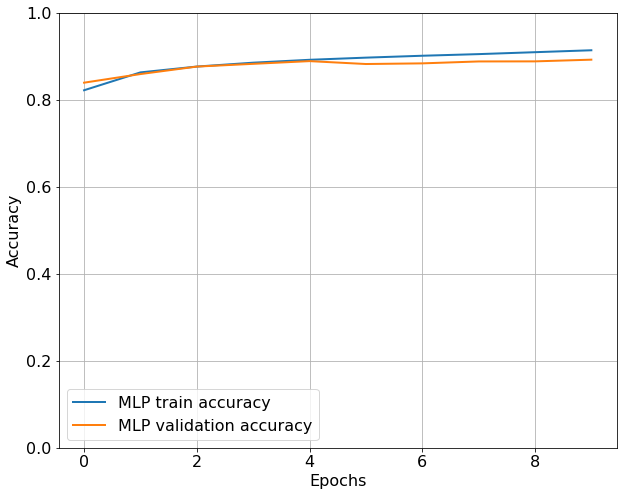

In [10]:
# define the function:
def plot_history(hs, epochs, metric):
    plt.rcParams['font.size'] = 16
    plt.figure(figsize=(10, 8))
    for label in hs:
        plt.plot(hs[label].history[metric], label='{0:s} train {1:s}'.format(label, metric), linewidth=2)
        plt.plot(hs[label].history['val_{0:s}'.format(metric)], label='{0:s} validation {1:s}'.format(label, metric), linewidth=2)
    plt.ylim((0, 1))
    plt.xlabel('Epochs')
    plt.ylabel('Loss' if metric=='loss' else 'Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

plot_history(hs={'MLP': history_mlp}, epochs=15, metric='loss')
plot_history(hs={'MLP': history_mlp}, epochs=15, metric='accuracy')

In [11]:
mlp_train_loss, mlp_train_acc = model_mlp.evaluate(train_x,  train_y, verbose=0)
print('\nTrain accuracy:', np.round(mlp_train_acc,3))

mlp_val_loss, mlp_val_acc = model_mlp.evaluate(val_x,  val_y, verbose=0)
print('\nValidation accuracy:', np.round(mlp_val_acc,3))

mlp_test_loss, mlp_test_acc = model_mlp.evaluate(test_x,  test_y, verbose=0)
print('\nTest accuracy:', np.round(mlp_test_acc,3))


Train accuracy: 0.903

Validation accuracy: 0.889

Test accuracy: 0.874


**Train CNN model**

In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

print(model_cnn.summary())

model_cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [13]:
history_cnn = model_cnn.fit(train_x, 
                           train_y, 
                           epochs=100, 
                           batch_size=32, 
                           validation_data=(val_x, val_y), 
                           callbacks=callback)

Epoch 1/100
1500/1500 [==============================] - 15s 4ms/step - loss: 0.4114 - accuracy: 0.8526 - val_loss: 0.3266 - val_accuracy: 0.8806
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8989 - val_loss: 0.2727 - val_accuracy: 0.9012
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2354 - accuracy: 0.9151 - val_loss: 0.2607 - val_accuracy: 0.9091
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2031 - accuracy: 0.9248 - val_loss: 0.2465 - val_accuracy: 0.9111
Epoch 5/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1710 - accuracy: 0.9372 - val_loss: 0.2477 - val_accuracy: 0.9154
Epoch 6/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1506 - accuracy: 0.9446 - val_loss: 0.2410 - val_accuracy: 0.9183
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9527 - val_loss: 0.2508 - val_a

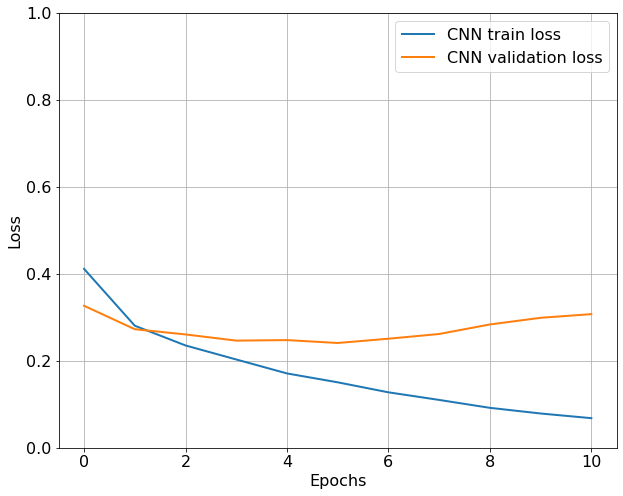

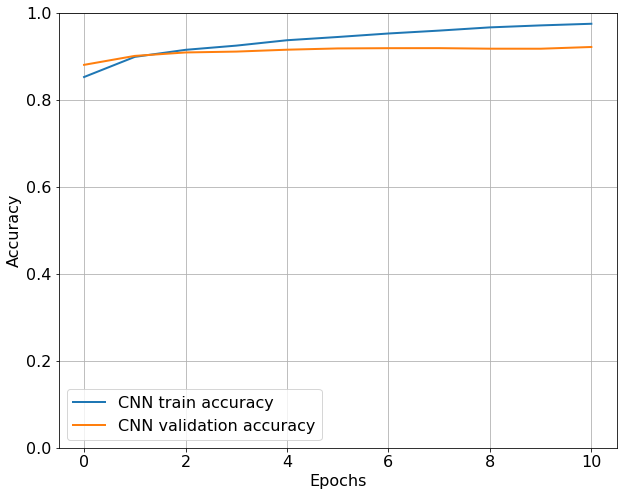

In [17]:
plot_history(hs={'CNN': history_cnn},epochs=15,metric='loss')
plot_history(hs={'CNN': history_cnn},epochs=15,metric='accuracy')

In [15]:
cnn_train_loss, cnn_train_acc = model_cnn.evaluate(train_x,  train_y, verbose=2)
print('\nTrain accuracy:', cnn_train_acc)

cnn_val_loss, cnn_val_acc = model_cnn.evaluate(val_x,  val_y, verbose=2)
print('\nValidation accuracy:', cnn_val_acc)

cnn_test_loss, cnn_test_acc = model_cnn.evaluate(test_x,  test_y, verbose=2)
print('\nTest accuracy:', cnn_test_acc)

1500/1500 - 3s - loss: 0.1124 - accuracy: 0.9614 - 3s/epoch - 2ms/step

Train accuracy: 0.9614375233650208
375/375 - 1s - loss: 0.2410 - accuracy: 0.9183 - 701ms/epoch - 2ms/step

Validation accuracy: 0.9183333516120911
313/313 - 1s - loss: 0.2613 - accuracy: 0.9114 - 873ms/epoch - 3ms/step

Test accuracy: 0.9114000201225281


References

https://towardsdatascience.com/create-image-classification-models-with-tensorflow-in-10-minutes-d0caef7ca011